In [63]:
import pandas as pd

# load the dataset.csv
df = pd.read_csv('../dataset.csv')
df.describe()

,pregnant,glucose_concentration,blood_pressure,skinfold_thickness,serum_insulin,mass_index,pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
# use PDA(Principal Component Analysis) to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)


In [65]:
# use LDAA(Linear Discriminant Analysis) to reduce the dimensionality of the dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(df, df['class'])
df_lda = lda.transform(df)

In [70]:
# use tree classifier to classify the dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = df.drop(columns=['class']), df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Accuracy of tree classifier on training set: {:.2f}'.format(tree.score(X_train, y_train)))
print('Accuracy of tree classifier on test set: {:.2f}'.format(tree.score(X_test, y_test)))

Accuracy of tree classifier on training set: 1.00
Accuracy of tree classifier on test set: 0.70


In [71]:
# use naive bayes classifier to classify the dataset
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.77
Accuracy of GNB classifier on test set: 0.74


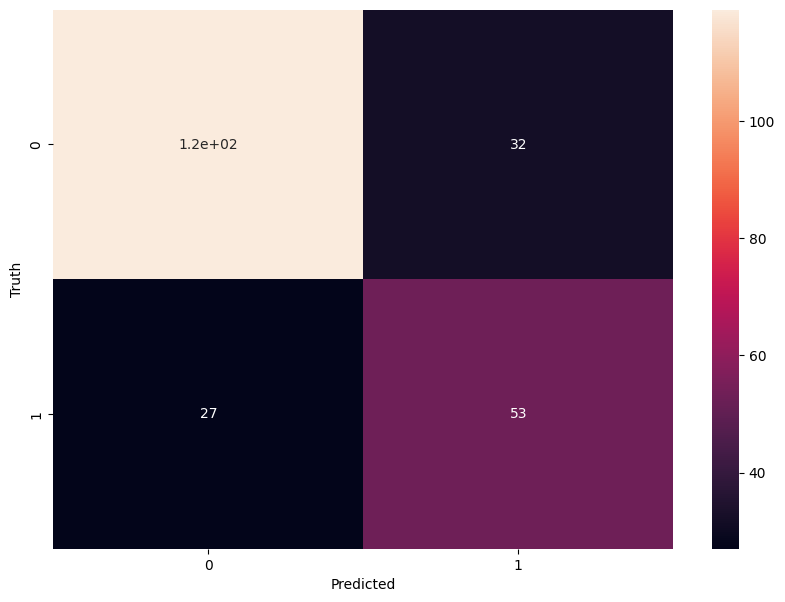

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [74]:
# plot the confusion matrix of the naive bayes classifier using numbers instead of colors
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = gnb.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

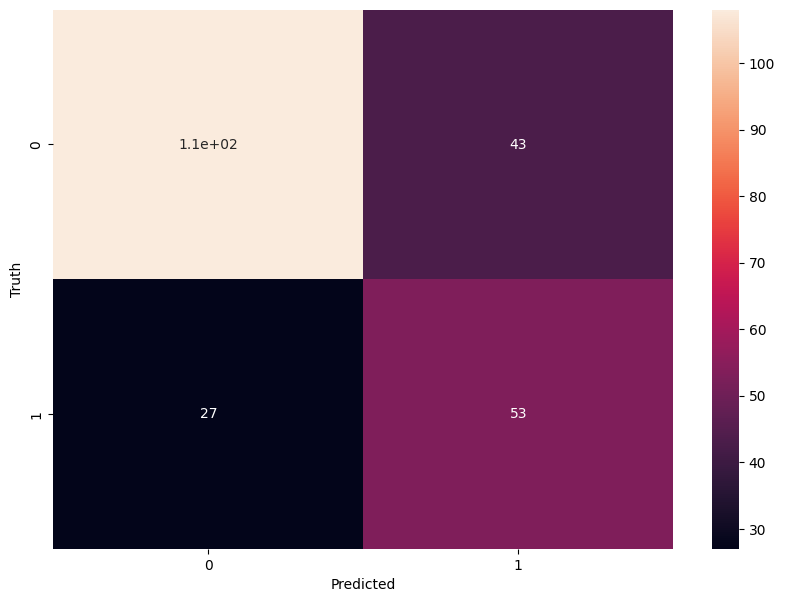

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.66      0.60        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231



In [73]:
# plot the confusion matrix of the tree classifier using numbers instead of colors
y_pred = tree.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# print sensitivity, accuracy, f1 score, and specificity of the naive bayes classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))